# Computational Challenge #9 

In this challenge you will develop different agent based models. These are representative of the models people use in research.

It will be easiest to see what is going on if you animate your simulations. While this is optional in the first three challenges, we suggest that you do it using, for example, FuncAnimation from matplotlib.

$\textbf{Group #1}$

In this challenge, you will implement Schelling’s model of segregation. For a description of the model, see p. 108 of the book by Easley and Kleinberg. As the book notes, you will have several options in the implementation, but the results should not differ. I suggest using a double loop to go over rows and columns of the lattice sequentially, so that you can easily terminate the simulation if no agents have moved during one entire iteration. Note that the system can also reach a dynamic equilibrium in which some of the agents will keep moving, but the pattern is largely static.

The size of the domain is determined by the width and height. The “empty ratio” is the fraction of the domain that is initially unoccupied, and the similarity threshold determines the fraction of different neighbors above which an agent will move. Set a maximal number of iterations, but also stop your simulations if your simulation reaches a stable state. For the following you can use a 50 by 50, or larger domain. The similarity ratio $r_{sim} = n_\textrm{similar neighbors}/n_\textrm{neighbors}$ is the fraction of neighbors that have the same color as the agent.

(a) Start with empty_ratio = 0.2, and increase the similarity threshold from 0.2 to 0.6. Run the simulation until the average similarity ratio, $r_{sim}$ converges (it may keep oscillating a little, so add some tolerance). Does convergence take longer for smaller or larger thresholds? Explain why this could be.

(b) Start with similarity_threshold = 0.4, and increase the empty_ratio from 0.1 to 0.6 in increments of 0.1 Run the simulation until convergence. Does convergence take longer for smaller or larger empty spaces? Explain why this could be.

(c) Run your simulations for similarity_threshold = 0.2–0.6 in increments of 0.1, and plot $r_{sim}$ over time. How does $r_{sim}$ relate to the similarity threshold?

(d) Now assume that with some probability $r$ even satisfied agent moves. That is there is a small probability $r$ that during a time step an agent moves to a random location, regardless of its neighborhood. How does increasing $r$ impact your observations in part (b)?

(e) BONUS: Animate your simulation.

----

We here built on the code from http://adilmoujahid.com/posts/2020/05/streamlit-python-schelling/

$\textbf{Answers:}$ 

(a) For low thresholds, convergence is very fast, because agents are quickly satisfied with their fraction of similar neighbors. As the threshold increases, convergence is slower and for a threshold of 0.6, it takes about 10 iterations. This happens because agents a lot of agents are not happy with their neighbors and so having them grouped together with higher thresholds takes more time.

(b) Convergence is slightly faster when there are more empty spaces.  This is intuitive and makes sense: the more house available, the easier and faster the displacement of agents according to their preference.

(c) It is clear from the plot that as the threshold increases, the mean similarity ratio also increases. This makes sense because, as the threshold increases, agents prefer to be with more people of the same race around, so the system converges to higher mean similarity ratios, i.e., more segregated populations.

(d) First, we need to note that having a nonzero probability $r$ of happy agents randomly changing, makes our model noisy. In fact, as we increase $r$, the mean similarity ratio becomes more and more noisy. 
Taken this into account, it is a bit hard to tell, but it seems that convergence time is independent of empty_ratio.

(e) For part (e), we provide the code 9.1_app.py. This code is supposed to be run in the command window typing: "streamlit run 9.1_app.py". Make sure all packages are installed in the virtual environment and a window will open up with nice GUI to run simulations changing paramenters.

In [1]:
import random
import numpy as np
import streamlit as st

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
class Schelling:
    
    def __init__(self, size, empty_ratio, similarity_threshold, n_neighbors):
        self.size = size 
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_neighbors = n_neighbors
        
        # Ratio of races (-1, 1) and empty houses (0)
        p = [(1-empty_ratio)/2, (1-empty_ratio)/2, empty_ratio]
        city_size = int(np.sqrt(self.size))**2
        self.city = np.random.choice([-1, 1, 0], size=city_size, p=p)
        self.city = np.reshape(self.city, (int(np.sqrt(city_size)), int(np.sqrt(city_size))))
    
    def run(self):
        for (row, col), value in np.ndenumerate(self.city):
            race = self.city[row, col]
            if race != 0:
                neighborhood = self.city[row-self.n_neighbors:row+self.n_neighbors, col-self.n_neighbors:col+self.n_neighbors]
                neighborhood_size = np.size(neighborhood)
                n_empty_houses = len(np.where(neighborhood == 0)[0])
                if neighborhood_size != n_empty_houses + 1:
                    n_similar = len(np.where(neighborhood == race)[0]) - 1
                    similarity_ratio = n_similar / (neighborhood_size - n_empty_houses - 1.)
                    is_unhappy = (similarity_ratio < self.similarity_threshold)
                    if is_unhappy:
                        empty_houses = list(zip(np.where(self.city == 0)[0], np.where(self.city == 0)[1]))
                        random_house = random.choice(empty_houses)
                        self.city[random_house] = race
                        self.city[row,col] = 0

    def get_mean_similarity_ratio(self):
        count = 0
        similarity_ratio = 0
        for (row, col), value in np.ndenumerate(self.city):
            race = self.city[row, col]
            if race != 0:
                neighborhood = self.city[row-self.n_neighbors:row+self.n_neighbors, col-self.n_neighbors:col+self.n_neighbors]
                neighborhood_size = np.size(neighborhood)
                n_empty_houses = len(np.where(neighborhood == 0)[0])
                if neighborhood_size != n_empty_houses + 1:
                    n_similar = len(np.where(neighborhood == race)[0]) - 1
                    similarity_ratio += n_similar / (neighborhood_size - n_empty_houses - 1.)
                    count += 1
        return similarity_ratio / count

## Sample run of Schelling model

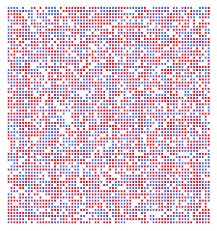

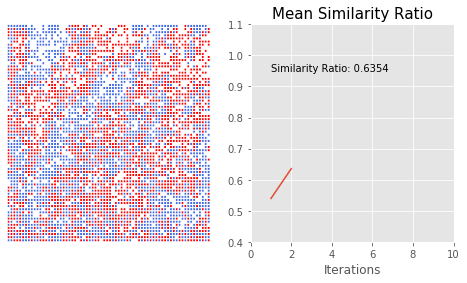

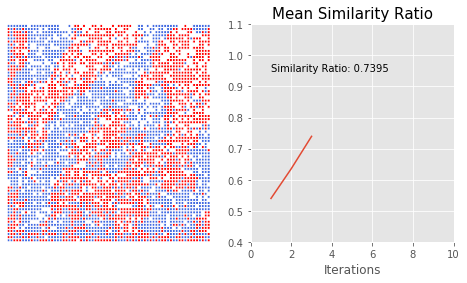

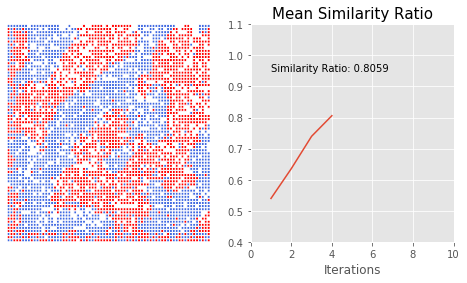

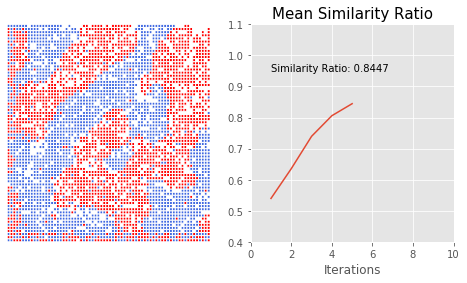

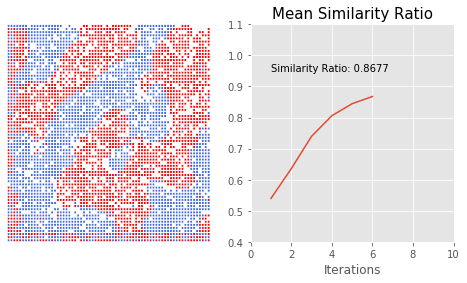

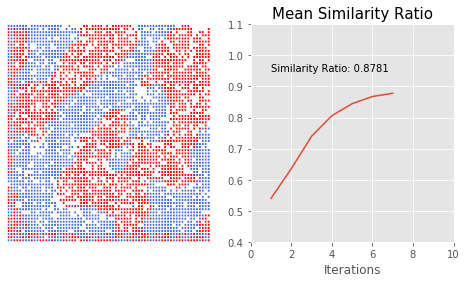

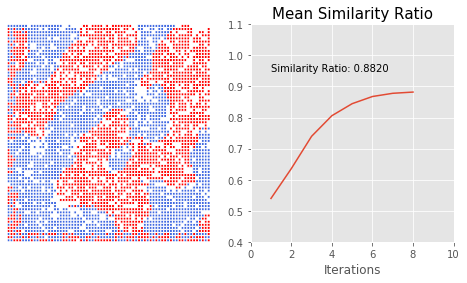

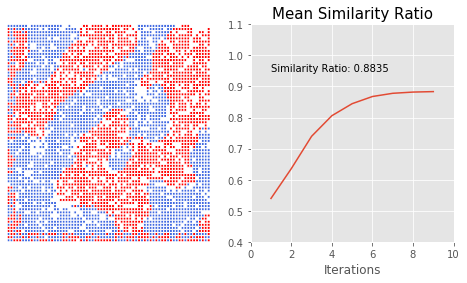

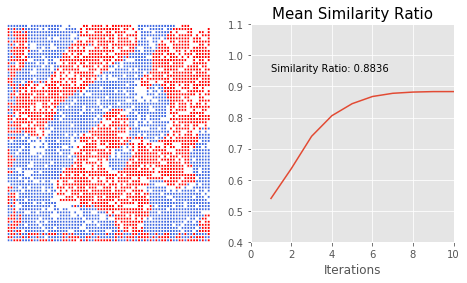

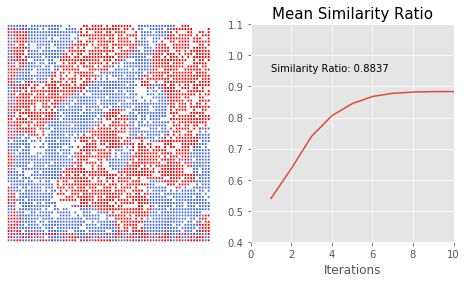

In [3]:
population_size = 5000
empty_ratio = 0.2
similarity_threshold = 0.4
n_iterations = 10

schelling = Schelling(population_size, empty_ratio, similarity_threshold, 3)
mean_similarity_ratio = []
mean_similarity_ratio.append(schelling.get_mean_similarity_ratio())

#Plot the graphs at initial stage
plt.style.use("ggplot")
plt.figure(figsize=(8, 4))

# Left hand side graph with Schelling simulation plot
cmap = ListedColormap(['red', 'white', 'royalblue'])
plt.subplot(121)
plt.axis('off')
plt.pcolor(schelling.city, cmap=cmap, edgecolors='w', linewidths=1)


for i in range(n_iterations):
    schelling.run()
    mean_similarity_ratio.append(schelling.get_mean_similarity_ratio())
    plt.figure(figsize=(8, 4))

    plt.subplot(121)
    plt.axis('off')
    plt.pcolor(schelling.city, cmap=cmap, edgecolors='w', linewidths=1)

    plt.subplot(122)
    plt.xlabel("Iterations")
    plt.xlim([0, n_iterations])
    plt.ylim([0.4, 1.1])
    plt.title("Mean Similarity Ratio", fontsize=15)
    plt.plot(range(1, len(mean_similarity_ratio)+1), mean_similarity_ratio)
    plt.text(1, 0.95, "Similarity Ratio: %.4f" % schelling.get_mean_similarity_ratio(), fontsize=10)

plt.show()

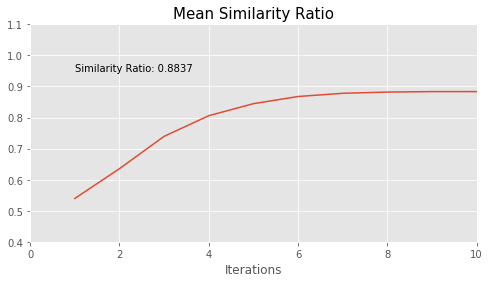

In [4]:
plt.figure(figsize=(8, 4))

plt.xlabel("Iterations")
plt.xlim([0, n_iterations])
plt.ylim([0.4, 1.1])
plt.title("Mean Similarity Ratio", fontsize=15)
plt.plot(range(1, len(mean_similarity_ratio)+1), mean_similarity_ratio)
plt.text(1, 0.95, "Similarity Ratio: %.4f" % schelling.get_mean_similarity_ratio(), fontsize=10)
plt.show()

## Part (a)

(a) Start with empty_ratio = 0.2, and increase the similarity threshold from 0.2 to 0.6. Run the simulation until the average similarity ratio, $r_{sim}$ converges (it may keep oscillating a little, so add some tolerance). Does convergence take longer for smaller or larger thresholds? Explain why this could be.


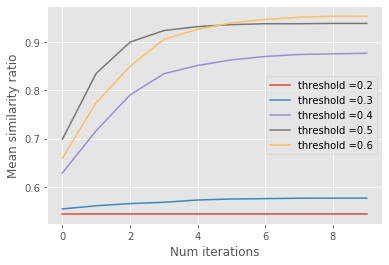

In [5]:
empty_ratio = 0.2
similarity_threshold = 0.4
n_iterations = 10

thr = [0.2,0.3,0.4,0.5,0.6]
mean_similarity_ratio = np.zeros((len(thr),n_iterations))

for j in range(len(thr)):
    schelling = Schelling(population_size, empty_ratio, thr[j], 3)
    for i in range(n_iterations):
        schelling.run()
        mean_similarity_ratio[j,i] = schelling.get_mean_similarity_ratio()

for j in range(len(thr)):
    plt.plot(mean_similarity_ratio[j,:], label='threshold ={}'.format(thr[j]))

plt.xlabel('Num iterations')
plt.ylabel('Mean similarity ratio')
plt.legend()

plt.show()

For low thresholds, convergence is very fast, because agents are quickly satisfied with their fraction of similar neighbors. As the threshold increases, convergence is slower and for a threshold of 0.6, it takes about 10 iterations. This happens because agents a lot of agents are not happy with their neighbors and so having them grouped together with higher thresholds takes more time.

## Part (b)

(b) Start with similarity_threshold = 0.4, and increase the empty_ratio from 0.1 to 0.6 in increments of 0.1 Run the simulation until convergence. Does convergence take longer for smaller or larger empty spaces? Explain why this could be.



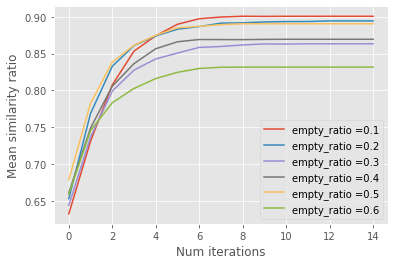

In [6]:
empty_ratio = 0.2
similarity_threshold = 0.4
n_iterations = 15

ratio = [0.1,0.2,0.3,0.4,0.5,0.6]
mean_similarity_ratio = np.zeros((len(ratio),n_iterations))

for j in range(len(ratio)):
    schelling = Schelling(population_size, ratio[j], similarity_threshold, 3)
    for i in range(n_iterations):
        schelling.run()
        mean_similarity_ratio[j,i] = schelling.get_mean_similarity_ratio()

for j in range(len(ratio)):
    plt.plot(mean_similarity_ratio[j,:], label='empty_ratio ={}'.format(ratio[j]))

plt.xlabel('Num iterations')
plt.ylabel('Mean similarity ratio')
plt.legend()

plt.show()

(b) Convergence is slightly faster when there are more empty spaces.  This is intuitive and makes sense: the more houses available, the easier and faster the displacement of agents according to their preference.



## Part (c)

Run your simulations for similarity_threshold = 0.2–0.6 in increments of 0.1, and plot $r_{sim}$ over time. How does $r_{sim}$ relate to the similarity threshold?

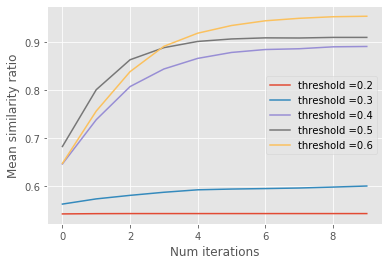

In [7]:
empty_ratio = 0.2
similarity_threshold = 0.4
n_iterations = 10

thr = [0.2,0.3,0.4,0.5,0.6]
mean_similarity_ratio = np.zeros((len(thr),n_iterations))

for j in range(len(thr)):
    schelling = Schelling(population_size, empty_ratio, thr[j], 3)
    for i in range(n_iterations):
        schelling.run()
        mean_similarity_ratio[j,i] = schelling.get_mean_similarity_ratio()
        
for j in range(len(thr)):
    plt.plot(mean_similarity_ratio[j,:], label='threshold ={}'.format(thr[j]))

plt.xlabel('Num iterations')
plt.ylabel('Mean similarity ratio')
plt.legend()

plt.show()

It is clear from the plot that as the threshold increases, the mean similarity ratio also increases. This makes sense because, as the threshold increases, agents prefer to be with more people of the same race around, so the system converges to higher mean similarity ratios, i.e., more segregated populations.

## Part (d)

(d) Now assume that with some probability $r$ even satisfied agent moves. That is there is a small probability $r$ that during a time step an agent moves to a random location, regardless of its neighborhood. How does increasing $r$ impact your observations in part (b)?


Recall: part (b) Start with similarity_threshold = 0.4, and increase the empty_ratio from 0.1 to 0.6 in increments of 0.1 Run the simulation until convergence. Does convergence take longer for smaller or larger empty spaces? Explain why this could be.



In [8]:
class Schelling_with_r:
    
    def __init__(self, size, empty_ratio, similarity_threshold, n_neighbors, r):
        self.size = size 
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_neighbors = n_neighbors
        self.r = r
        
        # Ratio of races (-1, 1) and empty houses (0)
        p = [(1-empty_ratio)/2, (1-empty_ratio)/2, empty_ratio]
        city_size = int(np.sqrt(self.size))**2
        self.city = np.random.choice([-1, 1, 0], size=city_size, p=p)
        self.city = np.reshape(self.city, (int(np.sqrt(city_size)), int(np.sqrt(city_size))))
    
    def run(self):
        for (row, col), value in np.ndenumerate(self.city):
            race = self.city[row, col]
            if race != 0:
                neighborhood = self.city[row-self.n_neighbors:row+self.n_neighbors, col-self.n_neighbors:col+self.n_neighbors]
                neighborhood_size = np.size(neighborhood)
                n_empty_houses = len(np.where(neighborhood == 0)[0])
                if neighborhood_size != n_empty_houses + 1:
                    n_similar = len(np.where(neighborhood == race)[0]) - 1
                    similarity_ratio = n_similar / (neighborhood_size - n_empty_houses - 1.)
                    is_unhappy = (similarity_ratio < self.similarity_threshold)
                    if is_unhappy:
                        empty_houses = list(zip(np.where(self.city == 0)[0], np.where(self.city == 0)[1]))
                        random_house = random.choice(empty_houses)
                        self.city[random_house] = race
                        self.city[row,col] = 0
                    # With probability r agent moves randomly even if it is happy.
                    elif np.random.uniform() < self.r:
                        empty_houses = list(zip(np.where(self.city == 0)[0], np.where(self.city == 0)[1]))
                        random_house = random.choice(empty_houses)
                        self.city[random_house] = race
                        self.city[row,col] = 0

    def get_mean_similarity_ratio(self):
        count = 0
        similarity_ratio = 0
        for (row, col), value in np.ndenumerate(self.city):
            race = self.city[row, col]
            if race != 0:
                neighborhood = self.city[row-self.n_neighbors:row+self.n_neighbors, col-self.n_neighbors:col+self.n_neighbors]
                neighborhood_size = np.size(neighborhood)
                n_empty_houses = len(np.where(neighborhood == 0)[0])
                if neighborhood_size != n_empty_houses + 1:
                    n_similar = len(np.where(neighborhood == race)[0]) - 1
                    similarity_ratio += n_similar / (neighborhood_size - n_empty_houses - 1.)
                    count += 1
        return similarity_ratio / count

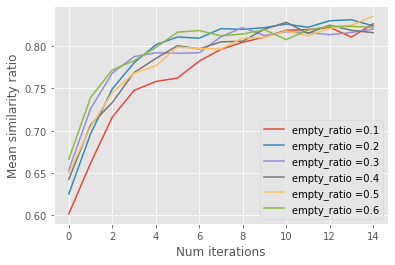

In [9]:
empty_ratio = 0.2
similarity_threshold = 0.4
n_iterations = 15
r = 0.1

ratio = [0.1,0.2,0.3,0.4,0.5,0.6]
mean_similarity_ratio = np.zeros((len(ratio),n_iterations))

for j in range(len(ratio)):
    schelling = Schelling_with_r(population_size, ratio[j], similarity_threshold, 3, r)
    for i in range(n_iterations):
        schelling.run()
        mean_similarity_ratio[j,i] = schelling.get_mean_similarity_ratio()

for j in range(len(ratio)):
    plt.plot(mean_similarity_ratio[j,:], label='empty_ratio ={}'.format(ratio[j]))

plt.xlabel('Num iterations')
plt.ylabel('Mean similarity ratio')
plt.legend()

plt.show()

First, we need to note that having a nonzero probability $r$ of happy agents randomly changing, makes our model noisy. In fact, as we increase $r$, the mean similarity ratio becomes more and more noisy. 

Taken this into account, it is a bit hard to tell, but it seems that convergence time is independent of empty_ratio.

## Part (e)

For part (e), we provide the code 9.1_app.py. This code is supposed to be run in the command window typing: "streamlit run 9.1_app.py". Make sure all packages are installed in the virtual environment and a window will open up with nice GUI to run simulations changing paramenters.